Moon-Shaped Dataset with Perceptrons

The moon dataset is another non-linearly separable dataset where two classes form two crescent shapes. This dataset is often used to demonstrate clustering and classification techniques that need to learn complex boundaries.



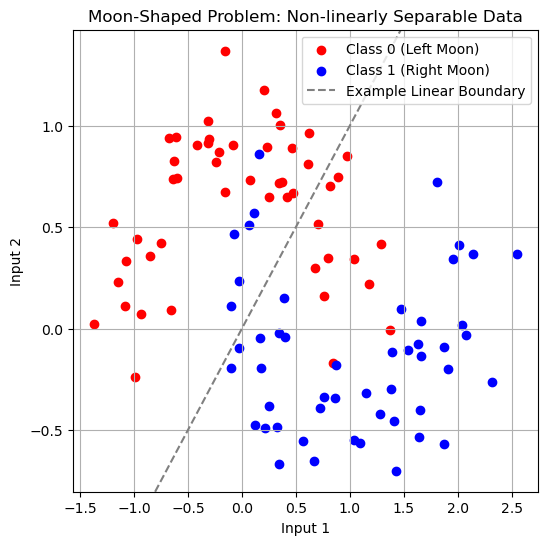

In [31]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate Moon-Shaped Dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Plot the Moon data
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0 (Left Moon)')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1 (Right Moon)')
plt.axline((0, 0), (1, 1), color='gray', linestyle='--', label='Example Linear Boundary')
plt.title("Moon-Shaped Problem: Non-linearly Separable Data")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()
plt.grid(True)
plt.show()

Building a Multi-Layer Perceptron (MLP) model using the CIFAR-10 dataset. This model will use L2 regularization, dropout, and batch normalization to improve performance and prevent overfitting.



In [13]:
from tensorflow.keras import layers, models, regularizers

# Building the MLP model for CIFAR-10
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32 color images into vectors
    layers.Dense(512, activation='relu'),  # First dense layer
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.005)),  # Second dense layer with L2 regularization
    layers.BatchNormalization(),  # Add batch normalization
    layers.Dropout(0.4),  # Dropout for regularization
    layers.Dense(128, activation='relu'),  # Third dense layer
    layers.Dropout(0.3),  # Additional dropout
    layers.Dense(10, activation='softmax')  # Output layer for 10-class classification
])

# Display the model architecture
model.summary()


C:\Users\Emma Srilekha\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,739,914 (6.64 MB)

 Trainable params: 1,739,402 (6.64 MB)

 Non-trainable params: 512 (2.00 KB)

In [15]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range 0-1
X_train, X_test = X_train / 255.0, X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, batch_size=64)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 63ms/step - accuracy: 0.2597 - loss: 2.7673 - val_accuracy: 0.1964 - val_loss: 2.4565
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.3435 - loss: 1.9120 - val_accuracy: 0.3670 - val_loss: 1.8506
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.3839 - loss: 1.7705 - val_accuracy: 0.3971 - val_loss: 1.7452
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.4089 - loss: 1.6815 - val_accuracy: 0.4138 - val_loss: 1.6593
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.4321 - loss: 1.6264 - val_accuracy: 0.4007 - val_loss: 1.7549
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.4460 - loss: 1.5896 - val_accuracy: 0.4243 - val_loss: 1.6219
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.4492 - loss: 1.5733 - val_accuracy: 0.4520 - val_loss: 1.5527
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.4562 - loss: 1.5481 - 

In [17]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [19]:
import keras_tuner as kt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a function for hyperparameter tuning
def build_cifar_model(hp):
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),  # CIFAR-10 input shape
        layers.Dense(hp.Int('units', min_value=64, max_value=512, step=64), activation='relu'),
        layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),  # Dropout regularization
        layers.Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'sgd']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Set up the tuner
tuner = kt.Hyperband(
    build_cifar_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='cifar_dir',
    project_name='cifar10_tuning'
)

# Perform the search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Best model test accuracy: {test_accuracy}")

Reloading Tuner from cifar_dir\cifar10_tuning\tuner0.json

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4846 - loss: 1.4716
Best model test accuracy: 0.48249998688697815


In [21]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy and loss
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


C:\Users\Emma Srilekha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 44ms/step - accuracy: 0.8817 - loss: 0.4071 - val_accuracy: 0.9870 - val_loss: 0.0509
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 34s 40ms/step - accuracy: 0.9819 - loss: 0.0563 - val_accuracy: 0.9877 - val_loss: 0.0410
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.9881 - loss: 0.0392 - val_accuracy: 0.9878 - val_loss: 0.0385
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9922 - loss: 0.0245 - val_accuracy: 0.9912 - val_loss: 0.0334
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.9927 - loss: 0.0211 - val_accuracy: 0.9902 - val_loss: 0.0320
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9875 - loss: 0.0383
Test accuracy: 0.9913
Test loss: 0.0265


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


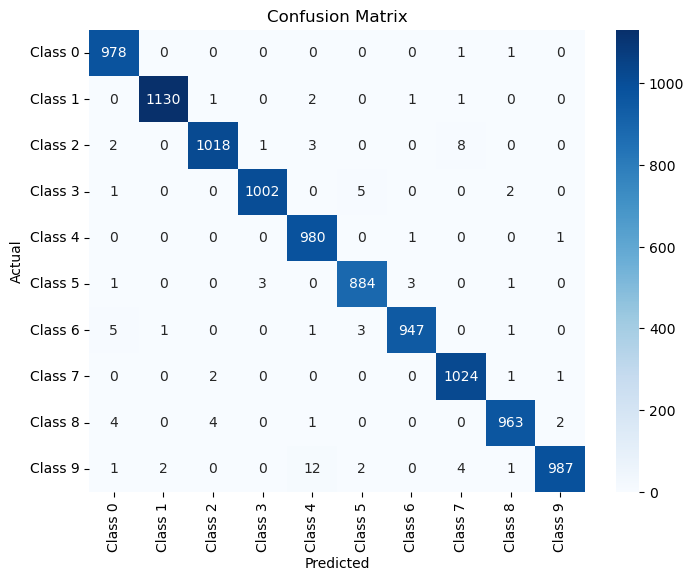

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions for the test dataset
y_pred = model.predict(X_test)  # Predict probabilities
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoding back to class labels

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f"Class {i}" for i in range(10)], 
            yticklabels=[f"Class {i}" for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


C:\Users\Emma Srilekha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 55ms/step - accuracy: 0.3652 - loss: 1.7417 - val_accuracy: 0.5599 - val_loss: 1.2363
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 55ms/step - accuracy: 0.5840 - loss: 1.1864 - val_accuracy: 0.6220 - val_loss: 1.0797
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 63ms/step - accuracy: 0.6382 - loss: 1.0370 - val_accuracy: 0.6383 - val_loss: 1.0389
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.6795 - loss: 0.9271 - val_accuracy: 0.6633 - val_loss: 0.9727
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7039 - loss: 0.8508 - val_accuracy: 0.6764 - val_loss: 0.9353
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.7291 - loss: 0.7757 - val_accuracy: 0.6849 - val_loss: 0.9157
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.7497 - loss: 0.7266 - val_accuracy: 0.6810 - val_loss: 0.9360
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 62ms/step - accuracy: 0.7686 - loss: 0.6663 - 

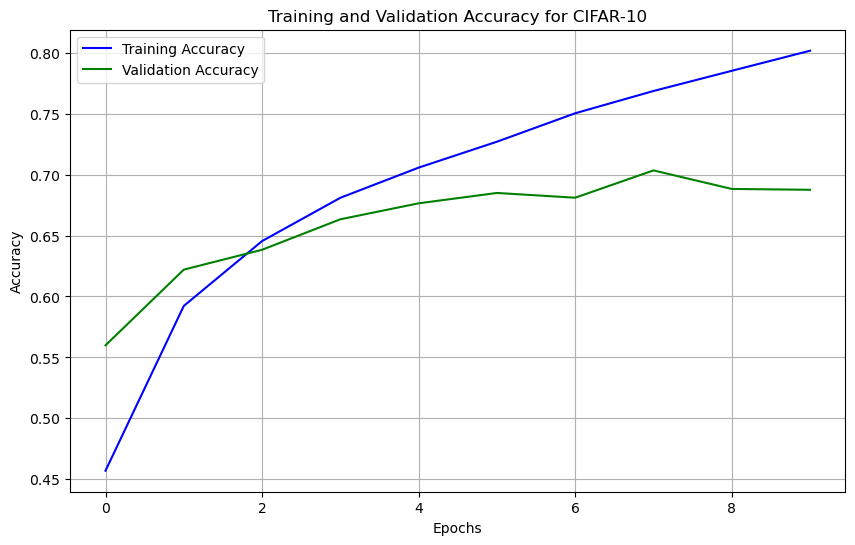

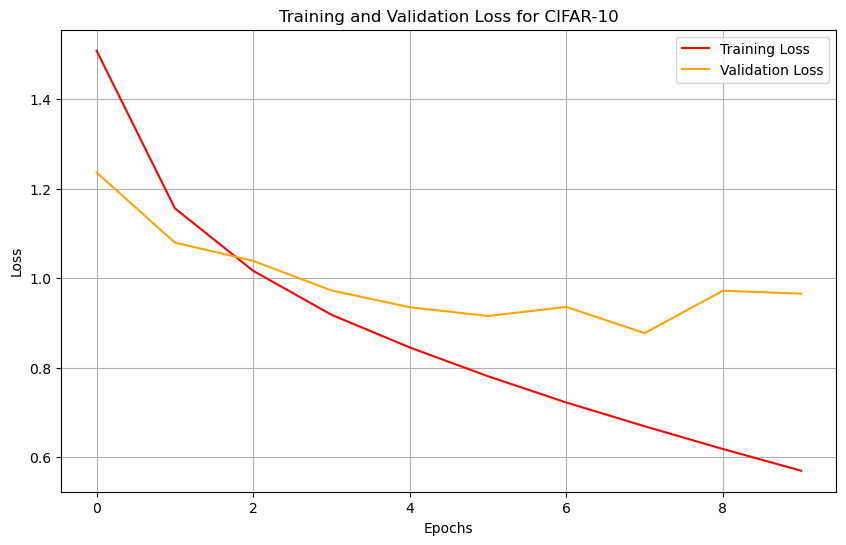

In [25]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a simple CNN model for CIFAR-10
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy for CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss for CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

# Load and preprocess CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a simple CNN model for CIFAR-10
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)  # Getting the index with the highest probability

# Convert one-hot encoded test labels back to original labels
y_test_labels = np.argmax(y_test, axis=1)

# Print the first 10 predictions and their actual labels
print("Predictions:", y_pred_labels[:10])
print("Actual labels:", y_test_labels[:10])


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 71ms/step - accuracy: 0.3986 - loss: 1.6629 - val_accuracy: 0.5933 - val_loss: 1.1622
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 48ms/step - accuracy: 0.6024 - loss: 1.1367 - val_accuracy: 0.6318 - val_loss: 1.0608
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.6636 - loss: 0.9700 - val_accuracy: 0.6470 - val_loss: 1.0218
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 54ms/step - accuracy: 0.6923 - loss: 0.8838 - val_accuracy: 0.6854 - val_loss: 0.9125
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.7300 - loss: 0.7839 - val_accuracy: 0.6904 - val_loss: 0.9095
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.7506 - loss: 0.7195 - val_accuracy: 0.6920 - val_loss: 0.9041
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.7746 - loss: 0.6447 - val_accuracy: 0.6965 - val_loss: 0.8922
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.7938 - loss: 0.5919 - 

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 63ms/step - accuracy: 0.3949 - loss: 1.6820 - val_accuracy: 0.5596 - val_loss: 1.2467
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.5917 - loss: 1.1604 - val_accuracy: 0.6409 - val_loss: 1.0351
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.6502 - loss: 1.0014 - val_accuracy: 0.6687 - val_loss: 0.9618
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.6848 - loss: 0.9099 - val_accuracy: 0.6765 - val_loss: 0.9523
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 63ms/step - accuracy: 0.7185 - loss: 0.8184 - val_accuracy: 0.6898 - val_loss: 0.9136
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.7396 - loss: 0.7519 - val_accuracy: 0.6839 - val_loss: 0.9233
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 66ms/step - accuracy: 0.7701 - loss: 0.6745 - val_accuracy: 0.6952 - val_loss: 0.9096
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7853 - loss: 0.6258 - 

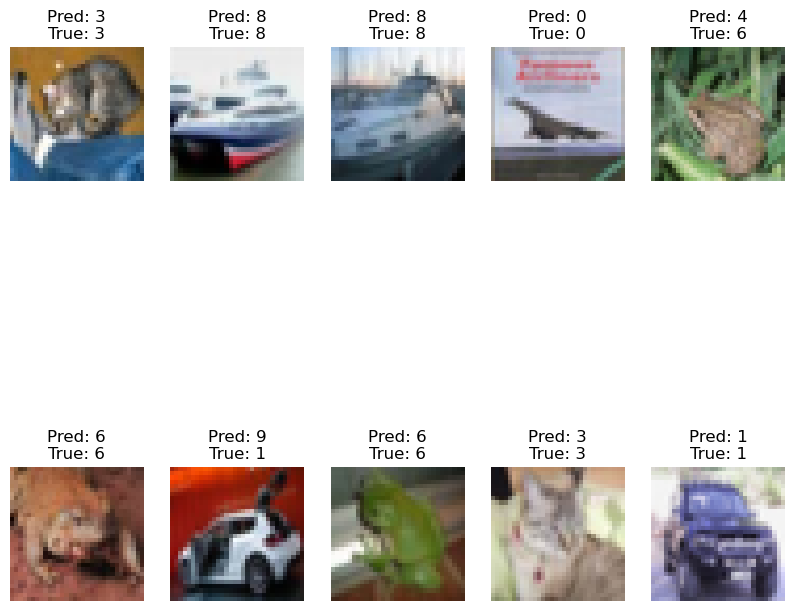

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

# Load and preprocess CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a simple CNN model for CIFAR-10
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions from probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert one-hot encoded test labels back to original labels
y_test_labels = np.argmax(y_test, axis=1)

# Visualize the first 10 test images with predictions and actual labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i])  # Display the image
    plt.title(f"Pred: {y_pred_labels[i]}\nTrue: {y_test_labels[i]}")
    plt.axis('off')
plt.show()
